# Read quality plots

To accurately classify minute amounts of microbial derived cfDNA, reads are removed by mapping to the spike-ins, applying quality filters and mapping to the host genome.

### Suppl. Fig. 202A


In [31]:
## import modules

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
from scipy.stats import f
import os
import statannotations
from statannotations.Annotator import Annotator
import matplotlib.colors as mcolors


In [33]:
## Print versions
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("seaborn", sns.__version__)
print("scipy", scipy.__version__)
print("statsmodels", sm.__version__)
print("statannotations", statannotations.__version__)

numpy 1.26.0
pandas 1.5.3
seaborn 0.11.2
scipy 1.11.3
statsmodels 0.14.0
statannotations 0.6.0


In [34]:
## Set plot parameters for later editing in illustrator

In [35]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['font.family'] = ['Arial']
SMALL_SIZE = 5
MEDIUM_SIZE = 6
BIGGER_SIZE = 7
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE, frameon=False)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
sns.set(rc={'font.family': 'Arial'}, font_scale=1.0)
sns.set_style("whitegrid", {'axes.grid': False})

In [36]:
# All path are relative to script and output folder in FBI repository


In [37]:
stats = pd.read_csv("../../output/02_tables/02_data_merged/all_basic_stats.csv")
df = pd.read_csv("../../output/02_tables/02_data_merged/EquAllRS_08_merged_domains_kindom.csv")
df_genus = pd.read_csv("../../output/02_tables/02_data_merged/EquAllRS_08_merged_genera.csv")

In [38]:
df_raw_seq = df.loc[:, ['FID','R1_01_raw_fastq','R1_02_spike_in_unmapped','R1_03_uniq_fastq','R1_04_fastp_fastq','R1_05_adapt_remov_fastq',]]
df_raw_seq.set_index('FID', drop = True, inplace = True)


In [39]:
df_raw_seq_diff = df_raw_seq.diff(axis= 1).apply(lambda x : -x )
df_raw_seq_diff['Duplicated reads'] = df_raw_seq_diff['R1_03_uniq_fastq']
df_raw_seq_diff['Low quality reads'] = df_raw_seq_diff[['R1_04_fastp_fastq','R1_05_adapt_remov_fastq']].sum(axis = 1)
df_raw_seq_diff['Spike in reads'] = df_raw_seq_diff['R1_02_spike_in_unmapped']
df_raw_seq_diff = df_raw_seq_diff.drop(columns = df_raw_seq_diff.loc[:,df_raw_seq_diff.columns.str.contains('R1')])
df_raw_seq_diff['Good quality reads'] = df_raw_seq['R1_01_raw_fastq'] - df_raw_seq_diff.sum(axis = 1)
df_raw_seq_diff = df_raw_seq_diff[df_raw_seq_diff.columns[::-1]].sort_index()

## Export source data for figure

In [40]:
df_raw_seq_diff.to_csv('../../output/03_microbial/source_data/SupplFig202AB.csv')

## Save figure to path

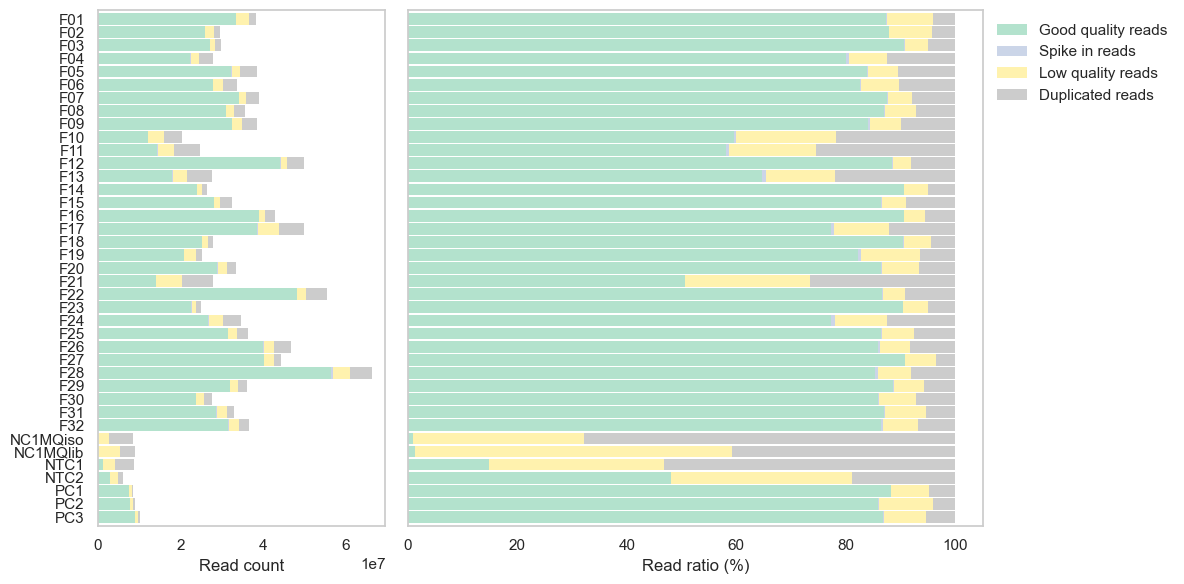

In [41]:
outpath = '../../output/03_microbial/figures/SupplFig202AB.pdf'

fig, axes = plt.subplots(1, 2, figsize= (12, 6), width_ratios=[1, 2], sharey=True)
# ['#B3E2CD','#FDCDAC']
df_raw_seq_diff.plot(kind='barh', stacked=True, ax = axes[0], width = 0.9, colormap = 'Pastel2', linewidth=0, legend = False)
# Don't show the series name
axes[0].set_ylabel('')
axes[0].set_xlabel('Read count')

# Normalize 
df_raw_seq_diff_normalized = df_raw_seq_diff.div(df_raw_seq_diff.sum(axis = 1), axis=0) * 100 
df_raw_seq_diff_normalized.plot(kind='barh', stacked=True, ax = axes[1], width = 0.9, colormap= 'Pastel2',linewidth=0)
axes[1].set_xlabel('Read ratio (%)')
plt.gca().invert_yaxis()
axes[1].legend(bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig(outpath)
plt.savefig(outpath+'.png', dpi = 300)

plt.show()

In [42]:
df2 = stats[['FID','Mapped to host genomes','unclassified_read_count','classified_read_count']]
df2.set_index('FID', drop = True, inplace = True)
df2.to_csv('../../output/03_microbial/source_data/SupplFig202CD.csv')

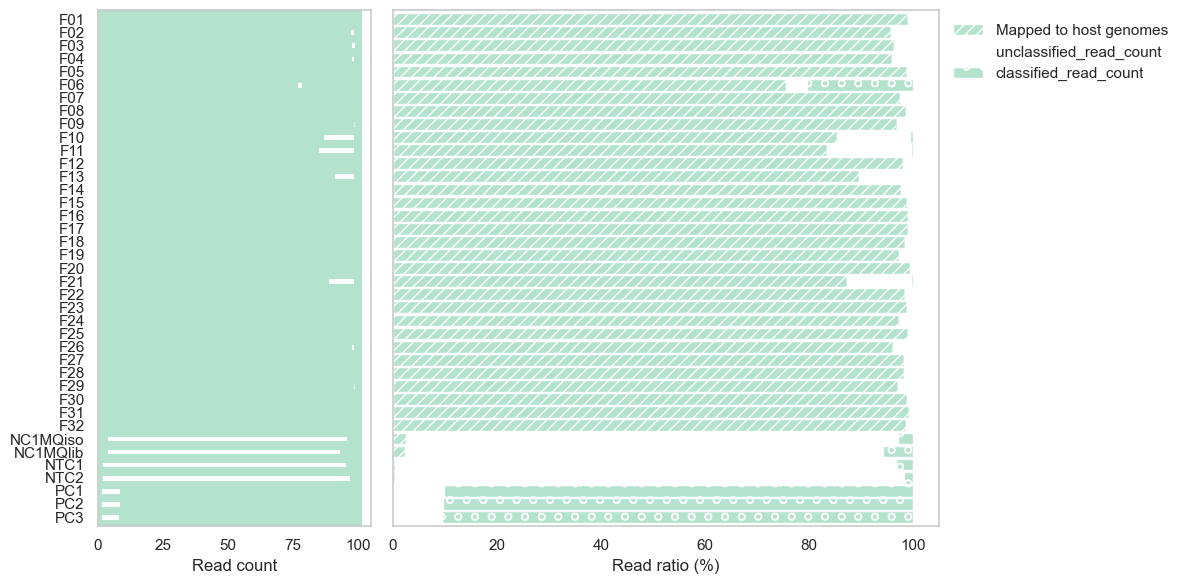

In [58]:
outpath = '../../output/03_microbial/figures/SupplFig202CD.pdf'

colors = ['#B3E2CD', '#FFFFFF', '#B3E2CD', ]  # Example colors
# Create a colormap from the list of colors
cmap_name = 'custom_cmap'
n_bins = len(colors)  # Number of colors
cus_cmap = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

fig, axes = plt.subplots(1, 2, figsize= (12, 6), width_ratios=[1, 2], sharey=True)
bars = df2.plot(kind='barh', stacked=True, ax = axes[0], width = 0.9, colormap = cus_cmap, linewidth=5, legend = False, edgecolor='#B3E2CD')
hatches = ['//////', '', 'ㄍ']  # Define hatching patterns
for bar, hatch in zip(bars.containers, hatches):
    for patch in bar:
        patch.set_hatch(hatch)
        patch.set_edgecolor(colors[0])

# Don't show the series name
axes[0].set_ylabel('')
# Normalize
df2 = df2.div(df2.sum(axis = 1), axis=0) * 100 
hatches = ['///', '', 'o']  # Define hatching patterns

bars = df2.plot(kind='barh', stacked=True, ax = axes[1], width = 0.9, colormap= cus_cmap,linewidth=1)
for bar, hatch in zip(bars.containers, hatches):
    for patch in bar:
        patch.set_hatch(hatch)
#        patch.set_edgecolor(colors[0])
plt.gca().invert_yaxis()
axes[1].legend(bbox_to_anchor=(1,1))
axes[0].set_xlabel('Read count')

axes[1].set_xlabel('Read ratio (%)')

plt.tight_layout()
plt.savefig(outpath)
plt.savefig(outpath+'.png', dpi = 300)
plt.show()